In [ ]:
import os



In [ ]:
# Core data libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# General settings
sns.set(style="whitegrid")


In [ ]:
# Load the dataset (make sure the filename matches exactly)
df = pd.read_csv("Carbon Emission.csv")

# Display first 5 rows
df.head()


Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0  overweight  female  pescatarian            daily                  coal   
1       obese  female   vegetarian  less frequently           natural gas   
2  overweight    male     omnivore  more frequently                  wood   
3  overweight    male     omnivore      twice a day                  wood   
4       obese  female   vegetarian            daily                  coal   

      Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
0        public          NaN           often                   230   
1  walk/bicycle          NaN           often                   114   
2       private       petrol           never                   138   
3  walk/bicycle          NaN       sometimes                   157   
4       private       diesel           often                   266   

  Frequency of Traveling by Air  Vehicle Monthly Distance Km Waste Bag Size  \
0                    frequently                          210          large   
1                        rarely                            9    extra large   
2                         never                         2472          small   
3                        rarely                           74         medium   
4               very frequently                         8457          large   

   Waste Bag Weekly Count  How Long TV PC Daily Hour  \
0                       4                          7   
1                       3                          9   
2                       1                         14   
3                       3                         20   
4                       1                          3   

   How Many New Clothes Monthly  How Long Internet Daily Hour  \
0                            26                             1   
1                            38                             5   
2                            47                             6   
3                             5                             7   
4                             5                             6   

  Energy efficiency                               Recycling  \
0                No                               ['Metal']   
1                No                               ['Metal']   
2         Sometimes                               ['Metal']   
3         Sometimes  ['Paper', 'Plastic', 'Glass', 'Metal']   
4               Yes                               ['Paper']   

                         Cooking_With  CarbonEmission  
0                   ['Stove', 'Oven']            2238  
1              ['Stove', 'Microwave']            1892  
2               ['Oven', 'Microwave']            2595  
3  ['Microwave', 'Grill', 'Airfryer']            1074  
4                            ['Oven']            4743

In [ ]:
# Shape of dataset
print("Rows, Columns:", df.shape)

# Column names
print("\nColumns:\n", df.columns)

# Data types and missing values
df.info()


Rows, Columns: (10000, 20)

Columns:
 Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy S

In [ ]:
# Statistical summary for numeric columns
df.describe()


Monthly Grocery Bill  Vehicle Monthly Distance Km  \
count          10000.000000                 10000.000000   
mean             173.875200                  2031.485900   
std               72.234018                  2769.715597   
min               50.000000                     0.000000   
25%              111.000000                    69.000000   
50%              173.000000                   823.000000   
75%              237.000000                  2516.750000   
max              299.000000                  9999.000000   

       Waste Bag Weekly Count  How Long TV PC Daily Hour  \
count            10000.000000               10000.000000   
mean                 4.024600                  12.139200   
std                  1.990375                   7.106369   
min                  1.000000                   0.000000   
25%                  2.000000                   6.000000   
50%                  4.000000                  12.000000   
75%                  6.000000                  18.000000   
max                  7.000000                  24.000000   

       How Many New Clothes Monthly  How Long Internet Daily Hour  \
count                  10000.000000                  10000.000000   
mean                      25.109000                     11.889100   
std                       14.698725                      7.277218   
min                        0.000000                      0.000000   
25%                       13.000000                      6.000000   
50%                       25.000000                     12.000000   
75%                       38.000000                     18.000000   
max                       50.000000                     24.000000   

       CarbonEmission  
count    10000.000000  
mean      2269.147300  
std       1017.675247  
min        306.000000  
25%       1538.000000  
50%       2080.000000  
75%       2768.000000  
max       8377.000000

In [ ]:
# ⚠️ CHANGE THIS if your dataset uses a different column name
target_column = "CarbonEmission"

# Check if target exists
if target_column not in df.columns:
    raise ValueError("Target column not found. Check df.columns and update target_column.")


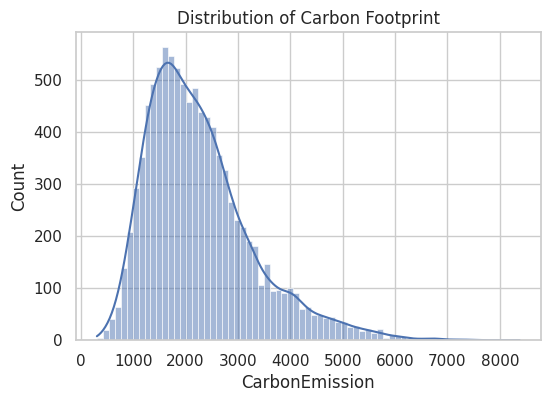

In [ ]:
# Distribution of carbon footprint
plt.figure(figsize=(6,4))
sns.histplot(df[target_column], kde=True)
plt.title("Distribution of Carbon Footprint")
plt.show()


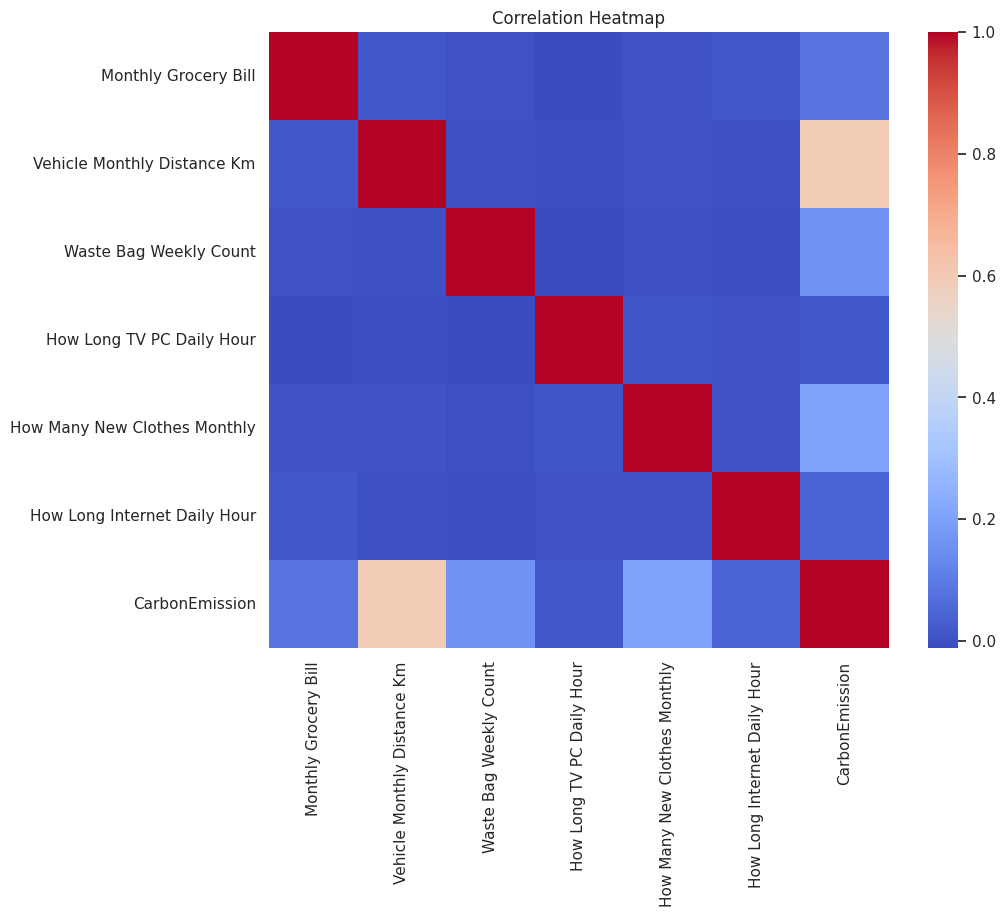

In [ ]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Fill numeric columns with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2898936499.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2898936499.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
X = df.drop(columns=[target_column])
y = df[target_column]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

X.head()


Monthly Grocery Bill  Vehicle Monthly Distance Km  Waste Bag Weekly Count  \
0                   230                          210                       4   
1                   114                            9                       3   
2                   138                         2472                       1   
3                   157                           74                       3   
4                   266                         8457                       1   

   How Long TV PC Daily Hour  How Many New Clothes Monthly  \
0                          7                            26   
1                          9                            38   
2                         14                            47   
3                         20                             5   
4                          3                             5   

   How Long Internet Daily Hour  Body Type_obese  Body Type_overweight  \
0                             1            False                  True   
1                             5             True                 False   
2                             6            False                  True   
3                             7            False                  True   
4                             6             True                 False   

   Body Type_underweight  Sex_male  ...  Cooking_With_['Oven']  \
0                  False     False  ...                  False   
1                  False     False  ...                  False   
2                  False      True  ...                  False   
3                  False      True  ...                  False   
4                  False     False  ...                   True   

   Cooking_With_['Stove', 'Grill', 'Airfryer']  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']  \
0                                              False          
1                                              False          
2                                              False          
3                                              False          
4                                              False          

   Cooking_With_['Stove', 'Microwave']  \
0                                False   
1                                 True   
2                                False   
3                                False   
4                                False   

   Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']  \
0                                              False                  
1                                              False                  
2                                              False                  
3                                              False                  
4                                              False                  

   Cooking_With_['Stove', 'Oven', 'Microwave']  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Cooking_With_['Stove', 'Oven']  Cooking_With_['Stove']  Cooking_With_[]  
0                            True                   False            False  
1                           False                   False            False  
2                           False                   False         

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 8000
Testing samples: 2000


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    return mae, rmse, r2


In [ ]:
linear_model = LinearRegression()

mae_lr, rmse_lr, r2_lr = evaluate_model(
    linear_model, X_train, y_train, X_test, y_test
)

print("Linear Regression Results")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R²  :", r2_lr)


Linear Regression Results
MAE : 175.62675416244304
RMSE: 261.61410875520556
R²  : 0.9341719789400632


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate on test data
y_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Results")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)



Random Forest Results
MAE : 229.58260499999997
RMSE: 297.6940195054311
R²  : 0.9147628939585999


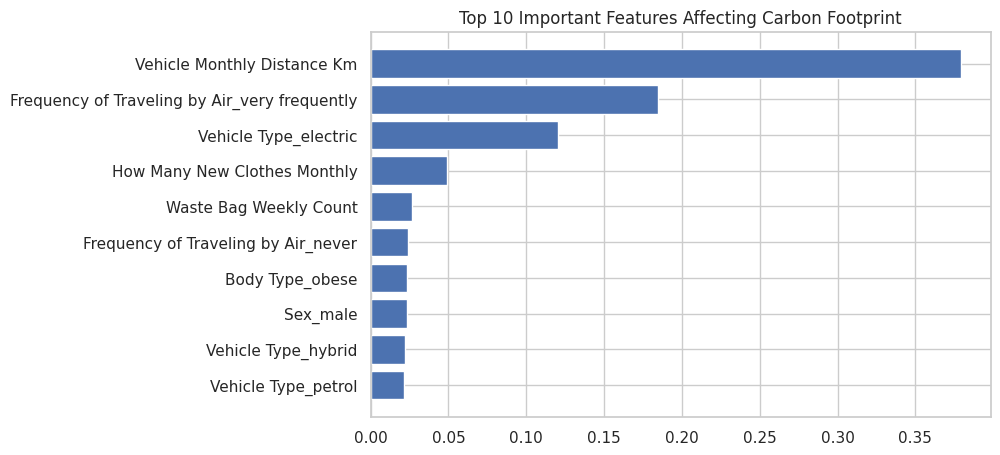

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Important Features Affecting Carbon Footprint")
plt.show()


In [ ]:
def generate_recommendations(user_row, predicted_value):
    tips = []

    if predicted_value > y.quantile(0.75):
        tips.append("Your carbon footprint is high. Focus on reducing transport and energy usage.")
    elif predicted_value > y.median():
        tips.append("Your footprint is moderate. Small daily changes can reduce it.")
    else:
        tips.append("Your footprint is low. Maintain your current habits.")

    if "electricity_kwh" in user_row and user_row["electricity_kwh"] > df["electricity_kwh"].median():
        tips.append("Reduce electricity usage by switching to efficient appliances.")

    if "transport_car_km" in user_row and user_row["transport_car_km"] > df["transport_car_km"].median():
        tips.append("Consider walking, cycling, or public transport for short trips.")

    if "meat_meals_per_week" in user_row and user_row["meat_meals_per_week"] > 5:
        tips.append("Try reducing meat consumption and include more plant-based meals.")

    return tips


In [ ]:
# Example user input (CHANGE VALUES BASED ON YOUR DATASET)
sample_user = {
    "electricity_kwh": 18,
    "transport_car_km": 25,
    "meat_meals_per_week": 7
}

user_df = pd.DataFrame([sample_user])
user_df = pd.get_dummies(user_df)
user_df = user_df.reindex(columns=X.columns, fill_value=0)

prediction = rf_model.predict(user_df)[0]

print("Predicted Carbon Footprint:", round(prediction, 2))
print("\nRecommendations:")
for tip in generate_recommendations(user_df.iloc[0], prediction):
    print("-", tip)


Predicted Carbon Footprint: 1230.44

Recommendations:
- Your footprint is low. Maintain your current habits.


## Role of Generative AI in this Project

The core carbon footprint prediction is performed using supervised machine learning models
(Random Forest Regressor). Generative AI is used only as an explanatory layer to convert
numerical predictions and key influencing factors into human-readable, personalized
recommendations. The generative model does not influence or replace the machine learning
prediction logic.


In [ ]:
def footprint_level(prediction, target_series):
    if prediction > target_series.quantile(0.75):
        return "high"
    elif prediction > target_series.median():
        return "moderate"
    else:
        return "low"


In [ ]:
def get_top_features(model, X, top_n=3):
    importances = model.feature_importances_
    feature_importance = pd.Series(importances, index=X.columns)
    return feature_importance.sort_values(ascending=False).head(top_n)


In [ ]:
top_features = get_top_features(rf_model, X)
top_features


Vehicle Monthly Distance Km                      0.379338
Frequency of Traveling by Air_very frequently    0.184506
Vehicle Type_electric                            0.120540
dtype: float64

In [ ]:
from openai import OpenAI
import os




In [ ]:
def generate_ai_explanation(prediction, level, top_features):
    prompt = f"""
A user has a {level} carbon footprint score of {prediction:.2f}.

The most influential contributing factors are:
{top_features.to_string()}

Explain this result in simple, friendly language suitable for a high school student.
Then provide 2–3 realistic and actionable suggestions to help reduce the carbon footprint.
Keep the response under 120 words.
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.5
    )

    return response.choices[0].message.content




In [ ]:
# Predict using the trained ML model for the sample user
prediction = rf_model.predict(user_df)[0]

# Determine footprint level
level = footprint_level(prediction, y)

# Get top contributing features
top_features = get_top_features(rf_model, X)

print("Predicted Carbon Footprint:", round(prediction, 2))
print("Footprint Level:", level.upper())

print("\nAI Explanation:\n")
print(generate_ai_explanation(prediction, level, top_features))


Predicted Carbon Footprint: 1230.44
Footprint Level: LOW

AI Explanation:

Your carbon footprint score of 1230.44 is influenced by a few key factors. First, you drive a lot (0.379338), which adds to your carbon emissions. Second, you travel by plane very often (0.184506), which also contributes significantly. Lastly, using an electric vehicle helps, but it’s not enough to offset the other factors (0.120540).

To reduce your carbon footprint, try these tips: 
1. Carpool or use public transportation to cut down on driving. 
2. Limit air travel by choosing local vacations or virtual meetings when possible. 
3. Consider biking or walking for shorter trips to further lower your impact.
